### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [1]:
nb_fname = "HA1_EllaGuiladi_JosefineEriksson.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [2]:
NAME1 = "Ella Guiladi" 
NAME2 = "Josfine Eriksson"
GROUP = ""

### Check Python version

In [3]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [4]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [5]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [6]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/JulianoLagana/deep-machine-learning/master/home-assignments/HA1/HA1.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# HA1 - Cats and dogs

<img src="https://cdn.pixabay.com/photo/2015/05/20/10/03/cat-and-dog-775116_960_720.jpg" alt="Image of cats and dogs" style="width: 500px;"/>

For this home assignment, we'll use the Kaggle dataset for the [Dogs vs. Cats competition](https://www.kaggle.com/c/dogs-vs-cats). It is comprised of 25k colour images of dogs and cats. Our goal with this dataset will be to create a classifier that can tell us if the input image is of a cat or a dog.

## Using your cloud GPU
As a way of helping you speed up the training process, each group gets access to a cloud instance with a GPU. Take a look at the [instructions folder](https://github.com/JulianoLagana/deep-machine-learning/blob/master/instructions/) to understand how to connect to an instance and use our tools there. You're free to use this limited resource as you see fit, but if you spend all your credits, you'll need a late day to obtain more (and you can only do this once).

### Strong recommendation:
In order to make the most out of your GPU hours, first try solving the initial part of this notebook (tasks 0-3) in your own computer (these tasks can be solved on the CPU), and leave most of the available hours for solving tasks 4-5, and refining your best model further (and, if you have the spare hours, experiment a bit!).

### Working efficiently:
Training for several epochs just to have your code break at the last validation step is incredibly frustrating and inefficient. Good practice is to first test long training runs with a much simpler dry-run: a single epoch, a few batches et c.

Requirements:
- Whenever we ask you to plot anything, be sure to add a title and label the axes. If you're plotting more than one curve in the same plot, also add a legend.
- When we ask you to train an architecture, train it for a reasonable number of epochs. "Reasonable" here means you should be fairly confident that training for a higher number of epochs wouldn't impact your conclusions regarding the model's performance. When experimenting, a single epoch is often enough to tell whether your model setup has improved or not.


Hints:
- If you get errors saying you've exhausted the GPU resources, well, then you've exhausted the GPU resources. However, sometimes that's because `pytorch` didn't release a part of the GPU's memory. If you think your CNN should fit in your memory during training, try restarting the kernel and directly training only that architecture.
- Every group has enough cloud credits to complete this assignment. However, this statement assumes you'll use your resources judiciously (e.g. always try the code first in your machine and make sure everything works properly before starting your instances) and **won't forget to stop your instance after using it,**  otherwise you might run out of credits.
- Before starting, take a look at the images we'll be using. This is a hard task, don't get discouraged if your first models perform poorly (several participants in the original competition didn't achieve an accuracy higher than 60%).
- Solving the [computer labs](https://github.com/JulianoLagana/deep-machine-learning/tree/master/computer-labs) is a good way to get prepared for this assignment.

---
## 0. Imports

In the following cell, add all the imports you'll use in this assignment.

In [7]:
import numpy as np 
import pandas as pd 

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision import transforms
from torch.nn import Conv2d, Linear
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models

%matplotlib inline

---
## 1. Loading the data and preprocessing

The first step is to head to the [Kaggle website for the cats and dogs competition](https://www.kaggle.com/c/dogs-vs-cats/data) and download the data from there. You should download both the test and train folders together in one zip file (there is a `Download all` button at the bottom of the page). Unfortunately, you need to create a Kaggle account for this.

**Only necessary for tasks 4-6**: Downloading the data to your local computer is quite straight-forward. Sooner or later you will have to upload the data to the cloud instance and that is a bit more tricky. There are a few ways to do it:

 - Jupyter Notebook upload function. When starting the notebook server with the command `jupyter notebook` you are directed to a main page. In the top right corner there is an upload button.
 - Using [`scp`](https://linuxize.com/post/how-to-use-scp-command-to-securely-transfer-files/) to copy files via an ssh connection.
 - Using the [Kaggle CLI](https://github.com/Kaggle/kaggle-api). We have added it to the conda environment.

For this assignment we will again need data loaders. Like before we need to create a `Dataset` to give as input to a `DataLoader`. 
Fortunately, this type of image data is quite common so we get some help from `pytorch`. We can use [`ImageFolder`](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) to create a `Dataset` for our images. As long as our folder structure for the data conforms to the folder structure expected by `ImageFolder`, we can use it right out of the box and the `DataLoader` class will happily accept it as input.

To use `ImageFolder` you should create a folder structure that resembles the following (obviously, the folder names are up to you):


         small_train             small_val                train                   val
              |                      |                      |                      |
              |                      |                      |                      |
        -------------          -------------          -------------          -------------
        |           |          |           |          |           |          |           |
        |           |          |           |          |           |          |           |
      cats        dogs       cats        dogs       cats        dogs       cats        dogs


The `small_train` and `small_val` folders have the training and validation samples for your smaller subset of the data, while the `train` and `val` folders contain all the samples you extracted from Kaggle's `train.zip`.
This is just a convenient way of having a smaller dataset to play with for faster prototyping.

We provide you a notebook that shows how to achieve this folder structure (`create_project_notebook_structure.ipynb`), starting from the original `dogs-vs-cats.zip` file that you download from Kaggle. If you do use that notebook, we encourage you to understand how each step is being done, so you can generalize this knowledge to new datasets you'll encounter.

For the smaller dataset, we advise you to use 70% of the data as training data (and thereby the remaining 30% for validation data). However, for the larger dataset, you should decide how to split between training and validation.

**What percentage of the larger dataset did you decide to use for training?**

**Your answer:** 

The big dataset will be comprised of:
- Train:	11250 cats and 11250 dogs (90%)
- Val:	1250 cats and 1250 dogs (10%)

**Optional (1 POE):** Did you decide to keep the same ratio split between train and validation sets for the larger dataset? Motivate your decision!


**Your answer:** 
- Since this dataset is very large, one can chose even a larger fraction to correspond to the training data, which will lead to a lower variance in the parameter estimation as well as increase the generalization abilities of the model. Since the dataset is so large, the size of the validation set will be enough for validation when using the ratio 90/10.

Fill in the dataset paths (to be used later by your data loaders):

In [8]:
# TODO: Change the directories accordingly
train_path = "train"
val_path = "val"
small_train_path = "small_train"
small_val_path = "small_val"

---
### 1.1 Preprocessing
**(1 POE)** 

Once you have the expected folder structure, create two data loaders for automatically generating batches from the images in your smaller subset of data. It is here we choose how to preprocess the input data. There are multiple reasons for why we preprocess data:

- Some transformations might be needed to actually make the data work with our network (reshaping, permuting dimensions et c.).
- Make the training more efficient by making the input dimensions smaller, e.g. resizing, cropping.
- Artificially expanding the training data through [data augmentation](https://cartesianfaith.com/2016/10/06/what-you-need-to-know-about-data-augmentation-for-machine-learning/)
- We have some clever idea of how to change the data to make the training process better.

We do not expect you to do data augmentation, but feel free to preprocess the data as you see fit.
Construct an `ImageFolder` dataset like this:

```python
ImageFolder(<path_to_data_folder>, transform=Compose(<list_of_transforms>))
# example:
ImageFolder(Path.cwd() / "small_train", transform=Compose([ToTensor]))
```

Hints:
- Take a look at [`ImageFolder`](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) and [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) from the pytorch docs.
- To preprocess the data you can use the built-in pytorch [`Transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html)
- The `ImageFolder` dataset provides the data as a python image type. For easy conversion to a `torch.Tensor`, use the [`ToTensor`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor) transformation.
- The specified `batch_size` should be chosen so that you train fast but don't run out of memory. You need to figure this out empirically; start small and increase the batch size until you run out of memory.
- The `DataLoader` constructor takes an optional argument `num_workers`, which defaults to `0` if not provided. Setting a higher number creates multiple threads which load batches concurrently. This can speed up training considerably.  
- When feeding the images to your CNN, you'll probably want all of them to have the same spatial size, even though the .jpeg files differ in this. Resizing the images can be done using the previously mentioned built-in pytorch Transforms.
- Resizing the images to a smaller size while loading them can be beneficial. The VGG network that is used later in this assignment requires that images are at least 224x224, but before that use small images to speed up training. The CNN's do surprisingly well on 64x64 or even 32x32 images. Shorter training cycles give your more time to experiment!

We encourage you to explore the data and choose transformations that you believe to be useful. For exploration we provide you with some helper functions to visually compare transformations side by side:

In [9]:
def compare_transforms(transformations, index):
    """Visually compare transformations side by side.
    Takes a list of ImageFolder datasets with different compositions of transformations.
    It then display the `index`th image of the dataset for each transformed dataset in the list.
    
    Example usage:
        compare_transforms([dataset_with_transform_1, dataset_with_transform_2], 0)
    
    Args:
        transformations (list(ImageFolder)): list of ImageFolder instances with different transformations
        index (int): Index of the sample in the ImageFolder you wish to compare.
    """
    
    # Here we combine two neat functions from basic python to validate the input to the function:
    # - `all` takes an iterable (something we can loop over, like a list) of booleans
    #    and returns True if every element is True, otherwise it returns False.
    # - `isinstance` checks whether a variable is an instance of a particular type (class)
    if not all(isinstance(transf, ImageFolder) for transf in transformations):
        raise TypeError("All elements in the `transformations` list need to be of type ImageFolder")
        
    num_transformations = len(transformations)
    fig, axes = plt.subplots(1, num_transformations)
    
    # This is just a hack to make sure that `axes` is a list of the same length as `transformations`.
    # If we only have one element in the list, `plt.subplots` will not create a list of a single axis
    # but rather just an axis without a list.
    if num_transformations == 1:
        axes = [axes]
        
    for counter, (axis, transf) in enumerate(zip(axes, transformations)):
        axis.set_title("transf: {}".format(counter))
        image_tensor = transf[index][0]
        display_image(axis, image_tensor)

    plt.show()

def display_image(axis, image_tensor):
    """Display a tensor as image
    
    Example usage:
        _, axis = plt.subplots()
        some_random_index = 453
        image_tensor, _ = train_dataset[some_random_index]
        display_image(axis, image_tensor)
    
    Args:
        axis (pyplot axis)
        image_tensor (torch.Tensor): tensor with shape (num_channels=3, width, heigth)
    """
    
    # See hint above
    if not isinstance(image_tensor, torch.Tensor):
        raise TypeError("The `display_image` function expects a `torch.Tensor` " +
                        "use the `ToTensor` transformation to convert the images to tensors.")
        
    # The imshow commands expects a `numpy array` with shape (3, width, height)
    # We rearrange the dimensions with `permute` and then convert it to `numpy`
    image_data = image_tensor.permute(1, 2, 0).numpy()
    height, width, _ = image_data.shape
    axis.imshow(image_data)
    axis.set_xlim(0, width)
    # By convention when working with images, the origin is at the top left corner.
    # Therefore, we switch the order of the y limits.
    axis.set_ylim(height, 0)

In [10]:
batch_size=32

data_transforms_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]), 
    
]) 


data_transforms_val = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]
) 


train_data = torchvision.datasets.ImageFolder(root=small_train_path,transform=data_transforms_train)
val_data = torchvision.datasets.ImageFolder(root=small_val_path,transform=data_transforms_val)


num_workers = 1
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

print(f'Num training images: {len(train_data_loader.dataset)}')
print(f'Num validation images: {len(val_data_loader.dataset)}')


Num training images: 3500
Num validation images: 1500


**(2 POE)** How did you select transformations, if any? Briefly explain your reasoning:

**Your answer:** 

As stated in the hints, it's often beneficial to resize the images to a smaller size in order to speed up the trainining. Since the size of the images needs to be at least 224x224 for the VGG16 network, we choose to use the same size during the entire problem. This transformation is applied to both training and validation data, since the image size will impact the number of parameters in the network, and thus need to be the same on both sets. We also normalize the entire dataset (both train and validation) to mean 0 and unit variance. By normalizing, one makes the backpropagation more stable by "helping" the weights to be close to zero. This transformation is applied after transforming the images to tensors, which one needs to do before feeding them into the network. Lastly, we apply the transformations RandomRotation and RandomHorizontalFlip, which artificially expands the training dataset by introducing randomness in the data. This data augmentation will help the network generalize since it sees the same images but in various ways.

---
## 2. Training

**(1 POE)**

Create your first CNN architecture for this task. Start with something as simple as possible, that you're almost sure can get an accuracy better than 50% (we'll improve upon it later).
Naturally, you must also select a loss function and an optimizer.

Hints:

- Training on a CPU is slow and in the beginning you just want to verify that your architecture actually produces a predicition with the correct shape. Make everything you can to speed up the prototyping phase, e.g. train only for a single epoch and make the images ridiculously small.
- Going from the last CNN layer to the final fully connected layer is not trivial. The convolutions produces "3D" output which we can think of as an image with many channels, while the fully connected layer expects a row vector as input. Calculate how many output features the convolutions produce and use `.reshape` to make your tensor fit the fully connected layer. (It is also common to see the `.view` method to do the same thing. They basically do the same thing but have some differences in internal memory management.) *Hint within the hint:* remember that the fully connected layers expects a *batch* of 1D tensors. 


In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3,32,kernel_size=5, padding=0, stride=1)
        self.pool1 = nn.MaxPool2d(4,4)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=0, stride=1)
        self.pool2 = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=0, stride=1)
        self.pool3 = nn.MaxPool2d(2,2)
        self.fc1   = nn.Linear(15488,10) 
        self.fc2   = nn.Linear(10,2)
      

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = torch.relu(x)
        x = self.pool3(x)
        x = x.flatten(1, -1)
        #print(x.shape)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
                
        return x

Train your model using the two data loaders you created earlier. Train for a reasonable amount of epochs, so as to get a good sense of how well this architecture performs.

Hints:
- Note that you will need to plot your training and validation losses and accuracies, so make sure that you saved them during training. 

In [12]:
# Any pytorch object (e.g. modelCNN, inputs, output, etc.) can 
# be transferred to the current device by running
#       name_of_object.to(device)
# Example:
#       modelCNN.to(device)
#
# The following line automatically figures out what device (cpu or gpu)
# you are using and stores the result in `device`.
# Later we can use the `.to(device)` method to move our data or modelCNN to the correct device.
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")

epochs=10
batch_size=32
learning_rate=0.01

modelCNN=CNN()
loss_func = nn.CrossEntropyLoss()
optimizer=optim.Adam(modelCNN.parameters(),learning_rate)

training_loss_vec=[]
validation_loss_vec=[]

training_acc_vec=[]
validation_acc_vec=[]

for epoch in range(epochs):
    losses = []
    n_correct = 0
    for b_x, b_y in train_data_loader:
        pred = modelCNN(b_x)
        loss = loss_func(pred, b_y)
        losses.append(loss.item())
        
        n_correct += (pred.argmax(dim=1) == b_y).sum().item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    train_accuracy = n_correct/len(train_data)
    train_avg_loss = sum(losses)/len(losses)    

        
    # Compute predictions in the validation set (with adagrad deactivated)
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_data_loader:
            pred = modelCNN(b_x)
            loss = loss_func(pred, b_y)
            losses.append(loss.item())
            
            n_correct += (pred.argmax(dim=1) == b_y).sum().item()
        val_accuracy = n_correct/len(val_data)
        val_avg_loss = sum(losses)/len(losses)      
        
    training_loss_vec.append(train_avg_loss)
    validation_loss_vec.append(val_avg_loss)
    
    training_acc_vec.append(train_accuracy)
    validation_acc_vec.append(val_accuracy)
    
    display_str = 'Epoch {}'
    display_str += '\tTraining Loss: {:.3f} '
    display_str += '\tValdiation loss : {:.3f}'
    display_str += '\tTrain accuracy: {:.2f}'
    display_str += '\tVal accuracy : {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))

Epoch 0	Training Loss: 0.923 	Valdiation loss : 0.694	Train accuracy: 0.49	Val accuracy : 0.50
Epoch 1	Training Loss: 0.695 	Valdiation loss : 0.694	Train accuracy: 0.51	Val accuracy : 0.50
Epoch 2	Training Loss: 0.692 	Valdiation loss : 0.705	Train accuracy: 0.52	Val accuracy : 0.50
Epoch 3	Training Loss: 0.697 	Valdiation loss : 0.693	Train accuracy: 0.49	Val accuracy : 0.50
Epoch 4	Training Loss: 0.694 	Valdiation loss : 0.693	Train accuracy: 0.49	Val accuracy : 0.50
Epoch 5	Training Loss: 0.694 	Valdiation loss : 0.693	Train accuracy: 0.50	Val accuracy : 0.50
Epoch 6	Training Loss: 0.695 	Valdiation loss : 0.693	Train accuracy: 0.51	Val accuracy : 0.50
Epoch 7	Training Loss: 0.694 	Valdiation loss : 0.694	Train accuracy: 0.51	Val accuracy : 0.50
Epoch 8	Training Loss: 0.694 	Valdiation loss : 0.693	Train accuracy: 0.50	Val accuracy : 0.50
Epoch 9	Training Loss: 0.694 	Valdiation loss : 0.693	Train accuracy: 0.49	Val accuracy : 0.50


Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

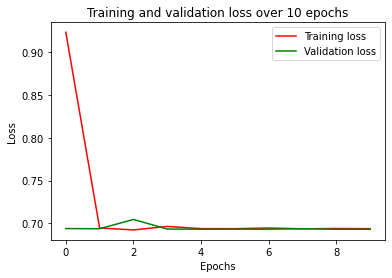

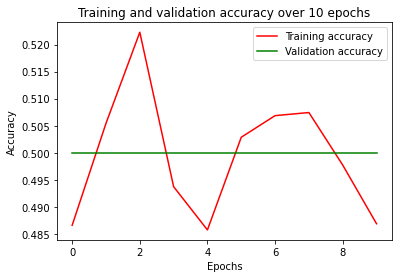

In [13]:
plt.plot(training_loss_vec,'r',label='Training loss')
plt.plot(validation_loss_vec,'g',label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss over 10 epochs')
plt.show()

plt.plot(training_acc_vec,'r',label='Training accuracy')
plt.plot(validation_acc_vec,'g',label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy over 10 epochs')
plt.show()


**(2 POE)** Based on these, what would you suggest for improving your model? Why?

**Your answer:** 

As one can see from the plots with losses, both for the training and validation data sets the losses are pretty saturated and does not decrease. This indictaes that the network does not learn - it converges to a bad local optima. Decreasing the learning rate might therefore be a good start in order to fix this problem.

One both datasets accuracys are close to 0.50, meaning that the model is not better in predicting than flipping a coin (in binary classifictaion there is a 50% chanse to randomly guess the right class each time). This is also an indication that the model does not learn. To improve the model performance, we will probabaly need to change the network architechture. Improvment in network architecture often requiers a bit of trial- and error, but we will start by increase/decrease the amount of fully connected layers in the network. By changing the architecture like this, one changes the characteristics of the network and the number of parameters to be trained. We will also try different variants of down-sampling by changing the stride and size of the max-pooling filters. E.g. by increasing the stride and decreasig the pooling-filter, less computations are needed in order to obtain the same dimensions. 

---
## 3. Improving your model

**(1 POE)** Continue to improve your model architecture by comparing the value of the metrics you're interested in for both the training and validation set. Try different ideas! When you're happy with one architecture, copy it in the cell below and train it here. Save the training and validation losses and accuracies. You'll use this later to compare your best model with the one using transfer learning.

**Note**: When trying different ideas, you'll end up with several different models. However, when submitting your solutions to Canvas, the cell below must contain only the definition and training of *one* model. Remove all code related to the models that were not chosen.

In [14]:
class CNN_imrpoved(nn.Module):
    def __init__(self):
        super(CNN_imrpoved, self).__init__()
        self.conv1 = nn.Conv2d(3,32,kernel_size=5, padding=0, stride=2)
        self.pool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=0, stride=2)
        self.pool2 = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=0, stride=2)
        self.pool3 = nn.MaxPool2d(2,2)
        self.fc1   = nn.Linear(1152,2)
      

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = torch.relu(x)
        x = self.pool3(x)
        x = x.flatten(1, -1)
        #print(x.shape)
        x = self.fc1(x)
                
        return x
    


epochs=10
batch_size=32
learning_rate=0.001

modelCNN_imrpoved=CNN_imrpoved()
loss_func = nn.CrossEntropyLoss()
optimizer=optim.Adam(modelCNN_imrpoved.parameters(),learning_rate)

training_loss_vec=[]
validation_loss_vec=[]

training_acc_vec=[]
validation_acc_vec=[]

for epoch in range(epochs):
    losses = []
    n_correct = 0
    for b_x, b_y in train_data_loader:
        pred = modelCNN_imrpoved(b_x)
        loss = loss_func(pred, b_y)
        losses.append(loss.item())
        
        n_correct += (pred.argmax(dim=1) == b_y).sum().item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    train_accuracy = n_correct/len(train_data)
    train_avg_loss = sum(losses)/len(losses)    

        
    # Compute predictions in the validation set (with adagrad deactivated)
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_data_loader:
            pred = modelCNN_imrpoved(b_x)
            loss = loss_func(pred, b_y)
            losses.append(loss.item())
            
            n_correct += (pred.argmax(dim=1) == b_y).sum().item()
        val_accuracy = n_correct/len(val_data)
        val_avg_loss = sum(losses)/len(losses)      
        
    training_loss_vec.append(train_avg_loss)
    validation_loss_vec.append(val_avg_loss)
    
    training_acc_vec.append(train_accuracy)
    validation_acc_vec.append(val_accuracy)
    
    display_str = 'Epoch {}'
    display_str += '\tTraining Loss: {:.3f} '
    display_str += '\tValdiation loss : {:.3f}'
    display_str += '\tTrain accuracy: {:.2f}'
    display_str += '\tVal accuracy : {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))

Epoch 0	Training Loss: 0.681 	Valdiation loss : 0.650	Train accuracy: 0.57	Val accuracy : 0.60
Epoch 1	Training Loss: 0.629 	Valdiation loss : 0.622	Train accuracy: 0.65	Val accuracy : 0.64
Epoch 2	Training Loss: 0.603 	Valdiation loss : 0.595	Train accuracy: 0.67	Val accuracy : 0.70
Epoch 3	Training Loss: 0.564 	Valdiation loss : 0.569	Train accuracy: 0.71	Val accuracy : 0.70
Epoch 4	Training Loss: 0.547 	Valdiation loss : 0.563	Train accuracy: 0.71	Val accuracy : 0.70
Epoch 5	Training Loss: 0.527 	Valdiation loss : 0.549	Train accuracy: 0.74	Val accuracy : 0.72
Epoch 6	Training Loss: 0.510 	Valdiation loss : 0.546	Train accuracy: 0.74	Val accuracy : 0.74
Epoch 7	Training Loss: 0.493 	Valdiation loss : 0.533	Train accuracy: 0.76	Val accuracy : 0.73
Epoch 8	Training Loss: 0.485 	Valdiation loss : 0.537	Train accuracy: 0.77	Val accuracy : 0.74
Epoch 9	Training Loss: 0.463 	Valdiation loss : 0.523	Train accuracy: 0.78	Val accuracy : 0.73


Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

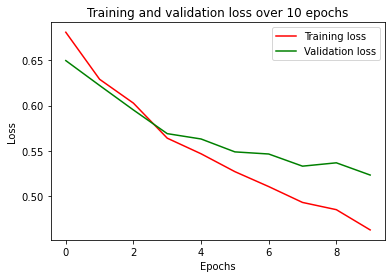

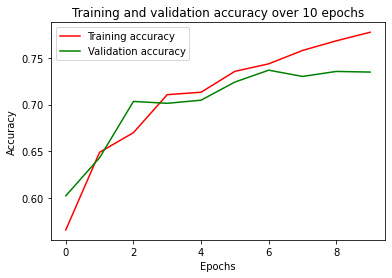

In [15]:
plt.plot(training_loss_vec,'r',label='Training loss')
plt.plot(validation_loss_vec,'g',label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss over 10 epochs')
plt.show()

plt.plot(training_acc_vec,'r',label='Training accuracy')
plt.plot(validation_acc_vec,'g',label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy over 10 epochs')
plt.show()

**(2 POE)** Did your results improve? What problems did your improvements fix? Explain why, or why not. 

**Your answer:** 

When comparing the plots from this sub-problem with those from the previous network, one can conclude that the changes we made has improved the network performance - the loss is lower and the accuracy is higher. But for some epochs the validation accuracy is higher than the training accuracy. This is not what we expected since the model is trained on the training data and thus should perform better on that data than on the unseen validation data. This might be do to bad/unsufficient pre-processing of the data or if the data is split in a way that resulted in statisticly independent training and validation sets, i.e. the validation set does not reflect the probability distribution of the data. Since the dataset is quite small, the splitting might have a significant impact and might result in a too small validation set. 

However, the improvements in accuracy that can be noticed are probably due to a decreased learning rate which helps the network to not get stuck in "bad" local optimas. The increased stride throughout the convolutional layers and decreased size of the filters in the first max-pooling layer has led to fewer trainable parameters and also fewer computations needed. The number of learnable parameters are also decreased by removing one of the last fully-connected layers. When not having that much data, as in our case with the small dataset, too many parameters may result in a network that does not learn. Improved performance by decreasing the number of parameters is thus a reasonable result. 

[Save your model](https://pytorch.org/tutorials/beginner/saving_loading_models.html) to disk (the architecture, weights and optimizer state). This is simply so you can use it again easily in the later parts of the notebook, without having to keep it in memory or re-training it. The actual file you create is not relevant to your submission. The code to save the model is given in the cell below. 

In [16]:
# Assuming that you called your model "my_model"
torch.save(modelCNN_imrpoved.state_dict(), "modelCNN_imrpoved")

---
## 4. Transfer Learning

**From now, training on CPU will not be feasible. If your computer has a GPU, try it out! Otherwise, now is the time to connect to your cloud instance**

Now, instead of trying to come up with a good architecture for this task, we'll use the VGG16 architecture, but with the top layers removed (the fully connected layers + softmax). We'll substitute them with a single fully connected layer, and a classification layer that makes sense for our problem.

However, this model has a very high capacity, and will probably suffer a lot from overfitting if we try to train it from scratch, using only our small subset of data. Instead, we'll start the optimization with the weights obtained after training VGG16 on the ImageNet dataset.

Start by loading the *pretrained* VGG16 model, from the [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html).

In [17]:
# YOUR CODE HERE
vgg16 = models.vgg16(pretrained=True)

Create a new model with the layers you want to add on top of VGG.

*Hint:*
- You can access and modify the top layers of the VGG model with `vgg_model.classifier`, and the remaining layers with `vgg_model.features`.
- You can get the number of output features of `vgg_model.features` with `vgg_model.classifier[0].in_features`

In [18]:
in_features = vgg16.classifier[0].in_features
top_layers = nn.Sequential(nn.Linear(in_features, 2), nn.Softmax(dim=1))

Now add the new model on top of VGG.

In [19]:
vgg16.classifier = top_layers

### 4.1 Using VGG features

Now we're almost ready to train the new model. However, since the top layers of this architecture are being initialized randomly, it's sometimes possible for them to generate large gradients that can wreck the pretraining of the bottom layers. To avoid this, freeze all the VGG layers in your architecture (i.e. signal to the optimizer that these should not be changed during optimization) by setting the attribute `requires_grad` for all parameters `vgg_model.features` to `False`.

In [20]:
# Freeze bottom
for param in vgg16.features.parameters():
    param.requires_grad = False

Perform the transfer learning by training the top layers of your model.

In [21]:
def train_model(model, criterion, optimizer, num_epochs, device, val_data_loader, train_data_loader, train_data, val_data):
    
    training_loss_vec=[]
    training_accuracy_vec=[]
    validation_loss_vec=[]
    validation_accuracy_vec=[]
    
    for epoch in range(num_epochs):
       
        #set model to trainable
        model.train()
        model.to(device)
        
        train_loss = 0
        n = len(train_data_loader)
        n_correct=0
        
        # Iterate over data.
        for i, (x,y) in enumerate(train_data_loader):
            #move inputs to device
            x = x.to(device)
            y = y.to(device)
            
            optimizer.zero_grad()
           
            # with torch.set_grad_enabled(True):
            outputs  = model(x)
            loss = criterion(outputs, y)
            
            loss.backward()
            optimizer.step()
            train_loss += loss.item() 
            n_correct += (outputs.argmax(dim=1) == y).sum().item()
        
        train_accuracy = n_correct/len(train_data)
        train_loss /= n
        training_loss_vec.append(train_loss)
        training_accuracy_vec.append(train_accuracy)
    
    
    
        model.eval()
        val_loss = 0.0
        n = len(val_data_loader)
        n_correct = 0
        for i, (x, y) in enumerate(val_data_loader):
            # Move input to device
            x = x.to(device)
            y = y.to(device)
        
            # Predict output, compute loss, perform optimizer step.
            outputs = model(x)
            loss = criterion(outputs, y)
        
            val_loss += loss.item()
            n_correct += (outputs.argmax(dim=1) == y).sum().item()
        
        val_accuracy = n_correct/len(val_data)
        val_loss /= n
        validation_loss_vec.append(val_loss)
        validation_accuracy_vec.append(val_accuracy)
        
    
        display_str = 'Epoch {}'
        display_str += '\tTraining Loss: {:.3f} '
        display_str += '\tValdiation loss : {:.3f}'
        display_str += '\tTrain accuracy: {:.2f}'
        display_str += '\tVal accuracy : {:.2f}'
        print(display_str.format(epoch, train_loss, val_loss, train_accuracy, val_accuracy))

    model.to(torch.device("cpu"))
    return validation_accuracy_vec, validation_loss_vec , training_loss_vec, training_accuracy_vec, model

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
learning_rate=0.001
optimizer = optim.Adam(params = vgg16.classifier.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
num_epochs=10
validation_accuracy_vec, validation_loss_vec , training_loss_vec, training_accuracy_vec, vgg_top_layer=train_model(vgg16, loss_fn, optimizer, num_epochs, device, val_data_loader, train_data_loader, train_data, val_data)

Epoch 0	Training Loss: 0.370 	Valdiation loss : 0.326	Train accuracy: 0.94	Val accuracy : 0.99
Epoch 1	Training Loss: 0.345 	Valdiation loss : 0.334	Train accuracy: 0.97	Val accuracy : 0.98
Epoch 2	Training Loss: 0.353 	Valdiation loss : 0.329	Train accuracy: 0.96	Val accuracy : 0.98
Epoch 3	Training Loss: 0.343 	Valdiation loss : 0.327	Train accuracy: 0.97	Val accuracy : 0.99
Epoch 4	Training Loss: 0.345 	Valdiation loss : 0.326	Train accuracy: 0.97	Val accuracy : 0.99
Epoch 5	Training Loss: 0.346 	Valdiation loss : 0.326	Train accuracy: 0.97	Val accuracy : 0.99
Epoch 6	Training Loss: 0.341 	Valdiation loss : 0.347	Train accuracy: 0.97	Val accuracy : 0.97
Epoch 7	Training Loss: 0.337 	Valdiation loss : 0.330	Train accuracy: 0.98	Val accuracy : 0.98
Epoch 8	Training Loss: 0.336 	Valdiation loss : 0.328	Train accuracy: 0.98	Val accuracy : 0.98
Epoch 9	Training Loss: 0.333 	Valdiation loss : 0.325	Train accuracy: 0.98	Val accuracy : 0.99


Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

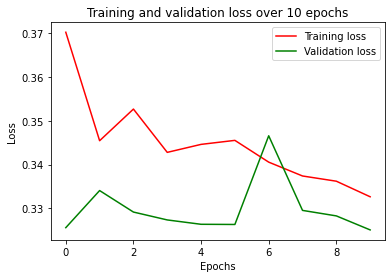

Text(0.5, 1.0, 'Training and validation accuracy over 10 epochs')

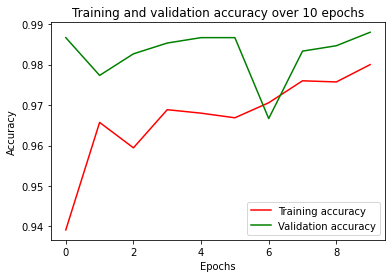

In [23]:
plt.plot(training_loss_vec,'r',label='Training loss')
plt.plot(validation_loss_vec,'g',label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss over 10 epochs')
plt.show()

plt.plot(training_accuracy_vec,'r',label='Training accuracy')
plt.plot(validation_accuracy_vec,'g',label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy over 10 epochs')

How does the model perform, compared to the model obtained in step 3? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

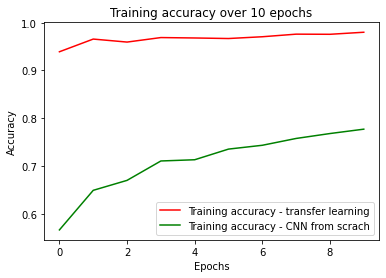

Text(0.5, 1.0, 'Validation accuracy over 10 epochs')

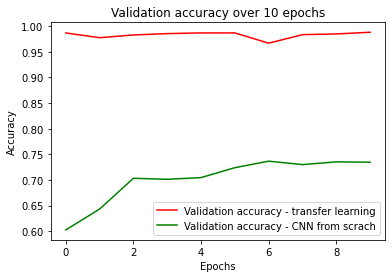

In [24]:
plt.plot(training_accuracy_vec,'r',label='Training accuracy - transfer learning')
plt.plot(training_acc_vec,'g',label='Training accuracy - CNN from scrach')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over 10 epochs')
plt.show()


plt.plot(validation_accuracy_vec,'r',label='Validation accuracy - transfer learning')
plt.plot(validation_acc_vec,'g',label='Validation accuracy - CNN from scrach')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation accuracy over 10 epochs')

**(2 POE)** Compare these results. Which approach worked best, starting from scratch or doing transfer learning? Reflect on whether your comparison is fair or not:

**Your answer:** 

By comparing the plots above, it is easy to see that the accuracy is much higher (and the loss lower) for the network where transfer-learning has been implemented. One can also see that the accuracy (for both training and validation data) is very high from the first epoch, which indicates that it is useful to use pre-trained weights and that the network can perform good from start using these. Implementing transfer learning is very time saving - instead of building and tune the entire network architechture and its hyper-parameters, one only needs to do this for a small fraction of the network (top-layer in our case). 

There are significant differences between the network we bulid from scratch and the network that we have implemented transfered-learning on, and the main difference is the depth of the convolutional layers. Instead of the three layers that we use in the CNN, the VGG16 base-layers has 16 layers. This very deep convolutional architecture has been found to be very suitable for large-scale image recognition. To use this architecture on a binary-classification problem on a small data set might therefore be slightly "un-fair" against the, in comparison, very shallow network that we built.  

**(1 POE)** What are the main differences between the ImageNet dataset and the Dogs vs Cats dataset we used?

**Your answer:** 

There are several differences between the two datasets, but the most significant is the scale. While the Dogs-vs-Cats has two classes, ImageNet has more than 20000. However, even though the ImageNet dataset is much bigger than the Dogs-vs-cats when comparing the total ammount of images, there are acctually less images within each class in the ImageNet dataset compared to the Dogs-vs-Cats dataset. This means that a network trained on the ImageNet has been trained on very varying data, but may suffer when comparing its performance with a network trained on a dataset with more training samples within each class. The more samples to train on within a class (i.e. broader range of images), the better will the network be to generalize. 

**Optional (2 POE)** Even though there are considerable differences between these datasets, why is it that transfer learning is still a good idea?

**Your answer:** 

The images in ImageNet contains several different images, including different images of cats and dogs aswell as other animals (propably different from images in our dataset as well). This indicates that when the vgg16 model was trained on the ImageNet dataset, alot of features has been learned that enables the model to identify images containing cats and dogs. By using transfer learning, we tranfer the weights that the vgg16 model learned from ImageNet to our cats and dogs dataset by only retraining the top layers (since the weights in the vgg16 are trained on the ImageNet dataset). The training is therefor much faster than when training everything from scratch.

**Optional (1 POE)** In which scenario would transfer learning be unsuitable?

**Your answer:** 

Transfer learning might not suitable when the weights of the source dataset were trained for a completely different task. If we want to train the network to predict cats and dogs, but use a network aiming to classify sick and healthy patients, the transfered weights will not help us in attaining better results since they are trained for a different task. The tasks needs to be similar in order for the transfer learning to work.


Save the model to a file.

In [25]:
torch.save(vgg_top_layer.state_dict(), "trans_learning_top_only")

### 4.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers by resetting the `requires_grad` attribute to `True`.

In [26]:
# UnFreeze bottom
for param in vgg_top_layer.features.parameters():
    param.requires_grad = True

Fine tune the model by training all the layers.

Hint:
- Even though we do have a decent starting point for the optimization, it's still possible that a bad hyper-parameter choice wrecks the preinitialization. Make sure to use a small learning rate for this step.

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
learning_rate=0.000001
optimizer = optim.Adam(params = vgg_top_layer.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
num_epochs=10
validation_accuracy_vec2, validation_loss_vec2 , training_loss_vec2, training_accuracy_vec2, vgg_all_layers=train_model(vgg_top_layer, loss_fn, optimizer, num_epochs, device, val_data_loader, train_data_loader, train_data, val_data)

Epoch 0	Training Loss: 0.332 	Valdiation loss : 0.325	Train accuracy: 0.98	Val accuracy : 0.99
Epoch 1	Training Loss: 0.326 	Valdiation loss : 0.324	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 2	Training Loss: 0.327 	Valdiation loss : 0.324	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 3	Training Loss: 0.330 	Valdiation loss : 0.324	Train accuracy: 0.98	Val accuracy : 0.99
Epoch 4	Training Loss: 0.328 	Valdiation loss : 0.323	Train accuracy: 0.98	Val accuracy : 0.99
Epoch 5	Training Loss: 0.327 	Valdiation loss : 0.322	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 6	Training Loss: 0.328 	Valdiation loss : 0.323	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 7	Training Loss: 0.326 	Valdiation loss : 0.323	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 8	Training Loss: 0.330 	Valdiation loss : 0.324	Train accuracy: 0.98	Val accuracy : 0.99
Epoch 9	Training Loss: 0.327 	Valdiation loss : 0.324	Train accuracy: 0.99	Val accuracy : 0.99


How does the model perform, compared to the model trained with frozen layers? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

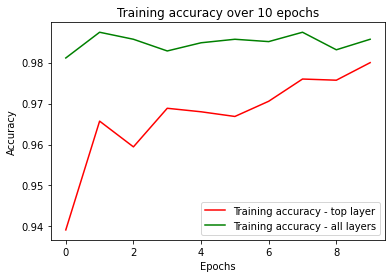

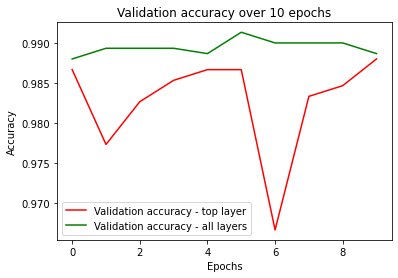

In [28]:
plt.plot(training_accuracy_vec,'r',label='Training accuracy - top layer')
plt.plot(training_accuracy_vec2,'g',label='Training accuracy - all layers')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over 10 epochs')
plt.show()


plt.plot(validation_accuracy_vec,'r',label='Validation accuracy - top layer')
plt.plot(validation_accuracy_vec2,'g',label='Validation accuracy - all layers')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation accuracy over 10 epochs')
plt.show()

**(1 POE)** Did the model's performance improve? Why (why not)?

**Your answer:** 

The models performance improved! This might be due to that when solely fine-tuning parameters in the top layers and freezing the parameters in the bottom layers, the network can't optimize the weights in the bottom layers. When not optimizing the bottom layers, the network might not learn features that are specific to the cats and dogs images as good, and might learn unimportant features that correspond to other images in the ImageNet. So, when unfreezing the bottom layers, the network is able to learn features specific to our dataset, as well as removing unnecessary features. One can also observe that the over all performance is better when the entire network is trained, the accuracy is generally higher and does not fluctuate as much as before. 

Save the model to file.

In [29]:
torch.save(vgg_all_layers.state_dict(), "trans_learning_full")

### 4.3 Improving the top model (optional)

Improve the architecture for the layers you add on top of VGG16. Try different ideas! When you're happy with one architecture, copy it in the cell below and train it here.

In [30]:
in_features = vgg_all_layers.classifier[0].in_features

vgg_all_layers.classifier = nn.Sequential(
                      nn.Linear(in_features, 1024), 
                      nn.BatchNorm1d(1024),
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(1024, 256), 
                      nn.BatchNorm1d(256),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                      nn.Linear(256, 2),
                      nn.Softmax(dim=1))



device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
learning_rate=0.00005
optimizer = optim.Adam(params = vgg_all_layers.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
num_epochs=10
validation_accuracy_vec_im, validation_loss_vec_im , training_loss_vec_im, training_accuracy_vec_im, vgg_all_layers_improved=train_model(vgg_all_layers, loss_fn, optimizer, num_epochs, device, val_data_loader, train_data_loader, train_data, val_data)


Epoch 0	Training Loss: 0.389 	Valdiation loss : 0.360	Train accuracy: 0.95	Val accuracy : 0.97
Epoch 1	Training Loss: 0.345 	Valdiation loss : 0.339	Train accuracy: 0.98	Val accuracy : 0.98
Epoch 2	Training Loss: 0.340 	Valdiation loss : 0.336	Train accuracy: 0.98	Val accuracy : 0.99
Epoch 3	Training Loss: 0.336 	Valdiation loss : 0.336	Train accuracy: 0.98	Val accuracy : 0.98
Epoch 4	Training Loss: 0.336 	Valdiation loss : 0.331	Train accuracy: 0.98	Val accuracy : 0.98
Epoch 5	Training Loss: 0.329 	Valdiation loss : 0.329	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 6	Training Loss: 0.335 	Valdiation loss : 0.335	Train accuracy: 0.98	Val accuracy : 0.98
Epoch 7	Training Loss: 0.329 	Valdiation loss : 0.330	Train accuracy: 0.99	Val accuracy : 0.98
Epoch 8	Training Loss: 0.326 	Valdiation loss : 0.357	Train accuracy: 0.99	Val accuracy : 0.96
Epoch 9	Training Loss: 0.330 	Valdiation loss : 0.329	Train accuracy: 0.98	Val accuracy : 0.99


**(1 POE)** How does the model perform, compared to the model trained in step 4.2? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

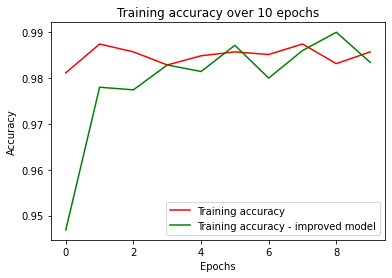

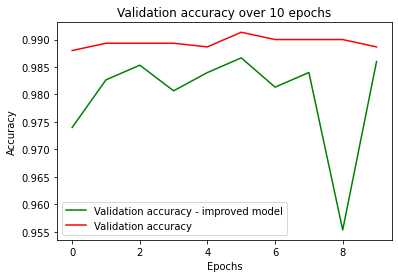

In [31]:
plt.plot(training_accuracy_vec2,'r',label='Training accuracy')
plt.plot(training_accuracy_vec_im,'g',label='Training accuracy - improved model')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over 10 epochs')
plt.show()


plt.plot(validation_accuracy_vec_im,'g',label='Validation accuracy - improved model')
plt.plot(validation_accuracy_vec2,'r',label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation accuracy over 10 epochs')
plt.show()

Save the model to a file.

In [32]:
torch.save(vgg_all_layers_improved.state_dict(), "best_trans_learning")

## 5. Final training

Now we'll train the model that achieved the best performance so far using the entire dataset.

**Note**: start the optimization with the weights you obtained training in the smaller subset, i.e. *not* from scratch.

First, create two new data loaders, one for training samples and one for validation samples. This time, they'll load data from the folders for the entire dataset.

In [33]:
train_data = torchvision.datasets.ImageFolder(root=train_path,transform=data_transforms_train)
val_data = torchvision.datasets.ImageFolder(root=val_path,transform=data_transforms_val)


num_workers = 1
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)


Train your model using the full data. This optimization might take a long time, so live plotting of some metrics is recommended.

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
learning_rate=0.00001
optimizer = optim.Adam(params = vgg_all_layers_improved.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
num_epochs=10
validation_accuracy_vec3, validation_loss_vec3 , training_loss_vec3, training_accuracy_vec3, vgg_all_layers2=train_model(vgg_all_layers_improved, loss_fn, optimizer, num_epochs, device, val_data_loader, train_data_loader, train_data, val_data)



Epoch 0	Training Loss: 0.332 	Valdiation loss : 0.325	Train accuracy: 0.98	Val accuracy : 0.99
Epoch 1	Training Loss: 0.328 	Valdiation loss : 0.321	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 2	Training Loss: 0.326 	Valdiation loss : 0.324	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 3	Training Loss: 0.325 	Valdiation loss : 0.324	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 4	Training Loss: 0.323 	Valdiation loss : 0.322	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 5	Training Loss: 0.322 	Valdiation loss : 0.321	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 6	Training Loss: 0.323 	Valdiation loss : 0.320	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 7	Training Loss: 0.322 	Valdiation loss : 0.324	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 8	Training Loss: 0.321 	Valdiation loss : 0.321	Train accuracy: 0.99	Val accuracy : 0.99
Epoch 9	Training Loss: 0.319 	Valdiation loss : 0.321	Train accuracy: 0.99	Val accuracy : 0.99


How does the model perform now when trained on the entire dataset, compared to when only trained on the smaller subset of data? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

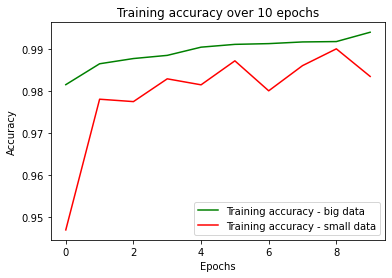

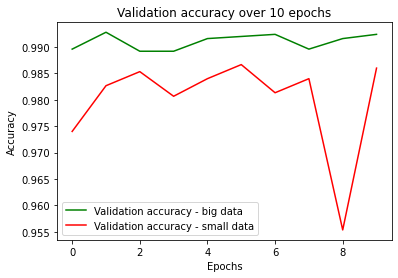

In [37]:
plt.plot(training_accuracy_vec3,'g',label='Training accuracy - big data')
plt.plot(training_accuracy_vec_im,'r',label='Training accuracy - small data')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy over 10 epochs')
plt.show()

plt.plot(validation_accuracy_vec3,'g',label='Validation accuracy - big data')
plt.plot(validation_accuracy_vec_im,'r',label='Validation accuracy - small data')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation accuracy over 10 epochs')
plt.show()

**(2 POE)** What can you conclude from these plots? Did you expect what you observe in the plots, explain!

**Your answer:** 
One can see that when using transfer learning on the larger dataset, the model still performs very good (highest performance so far), which was expected. The reason for this is that when using the larger dataset, we include more data for the model to train on. This results in that the model is able to generalize better (lowering the risk of overfitting), indicating that its more likely to make accurate predictions on the unseen validation data. If the model has good generalization capabilities, the chances of a succesfull transfer learning is increased.

It can be noted that both the first model and the improved model for transfer learning resulted in high performance, however the improved model might have had some epochs with lower performance. The improved model was however chosen as the one to perform the final training on, since the dataset now is much bigger and adding fully connected layers might therefor be beneficial in order to be able to model all the relationships between the input variables to the labels. This comes with a cost of a large number of parameters to tune in the model, but this is still the model that gave us the highest performance on the entire dataset on the final training.

## 6. Evaluation on test set (optional)

Now we'll evaluate your final model, obtained in step 6, on the test set. As mentioned before, the samples in the test set are not labeled, so we can't compute any performance metrics ourselves. 

As a bit of fun and to inspire some friendly competition you may instead submit it to Kaggle for evaluation.

Compute the predictions for all samples in the test set according to your best model, and save it in a .csv file with the format expected by the competition.

Hints:
- There is a `sampleSubmission.csv` file included in the zip data. Take a look at it to better understand what is the expected format here.
- `pathlib`'s `Path` class has a `glob` function, which returns the filenames of all files in a given path.
- If you don't know how to create and write to files with Python, Google can help.

In [36]:
# YOUR CODE HERE

Now that you created your submission file, submit it to Kaggle for evaluation. The [old competition](https://www.kaggle.com/c/dogs-vs-cats) does not allow submissions any more, but you can submit your file to the [new one](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) via the "Late submission" button (they use the same data). The Kaggle CLI can be used as well. Kaggle evaluates your submission according to your log-loss score. Which score did you obtain?

**Your answer:** (fill in here)

What was the username you used for this submission?

**Your answer:** (fill in here)